In [1]:
#add thu viện
import tensorflow as tf
import numpy as np
#print("TensorFlow version:", tf.__version__)

#tải bộ dữ liệu MNIST
mnist = tf.keras.datasets.mnist

#x_ bộ dữ liệu hình ảnh(chia thành tập huấn luyện và tập kiểm tra)
#y_ là các nhãn tương ứng
#Bộ dữ liệu MNIST chứa các hình ảnh của các chữ số viết tay từ 0 đến 9.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#chuẩn hóa giá trị pixel của hình ảnh 0 tới 255. 
#chia cho 255 để giá trị pixel chạy từ 0 tới 1, giúp mô hình học tốt hơn
x_train, x_test = x_train / 255.0, x_test / 255.0

#tạo mô hình nơ-ron sử dụng lớp 'Sequential'
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)), #được sử dụng để làm phẳng hình ảnh 28x28 thành 1 vector 2D có 784 phần tử
#tf.keras.layers.Dense(128, activation='relu'),
tf.keras.layers.Dense(100, activation='relu'),
tf.keras.layers.Dense(50, activation='relu'),#với 128 đơn vị và hàm kích hoạt ReLU
tf.keras.layers.Dropout(0.2), #với tỉ lệ dropout 0.2 để tránh overfitting
tf.keras.layers.Dense(10) #10 đơn vị đầu ra để dự đoán lớp của các chữ số
])

#dự đoán lớp cho 1 ví dụ từ tập huấn luyện x_train[:1] và được lưu vào biến pre
predictions = model(x_train[:1])
predictions

#xác định hàm mất mát. sử dụng cho bài toán phân loại 3 lớp, trong đó các nhãn là số nguyên
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#tính giá trị hàm mất mát giữa dự đoán predictions và nhãn thực tế y_train[:1]
loss_fn(y_train[:1], predictions)

#Biên soạn mô hình để huấn luyện. 
#Sử dụng trình tối ưu hóa 'adam', hàm mất mát đã được xác định ở trước 
#và độ đo 'accuracy' để theo dõi hiệu suất mô hình.
model.compile(optimizer='adam',
loss=loss_fn,
metrics=['accuracy'])
#Huấn luyện mô hình trên tập huấn luyện (x_train và y_train) trong 5 epochs (vòng lặp qua toàn bộ tập dữ liệu huấn luyện). 
#Mục tiêu là cải thiện mô hình để dự đoán chính xác hơn.
model.fit(x_train, y_train, epochs=5)

#Đánh giá hiệu suất của mô hình trên tập kiểm tra (x_test và y_test). 
#Kết quả bao gồm giá trị mất mát và độ chính xác của mô hình trên tập kiểm tra. 
#verbose=2 chỉ định cách hiển thị thông tin đánh giá.
model.evaluate(x_test, y_test, verbose=2)

#dùng để huấn luyện và đánh giá một dạng nơ-ron sử dụng dữ liệu từ bộ dữ liệu MNIST

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3107 - accuracy: 0.9083
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1399 - accuracy: 0.9582
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1036 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0814 - accuracy: 0.9753
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0697 - accuracy: 0.9790
313/313 - 1s - loss: 0.0829 - accuracy: 0.9765 - 816ms/epoch - 3ms/step


[0.08290186524391174, 0.9764999747276306]

170498071/170498071 [==============================] - 161s 1us/step


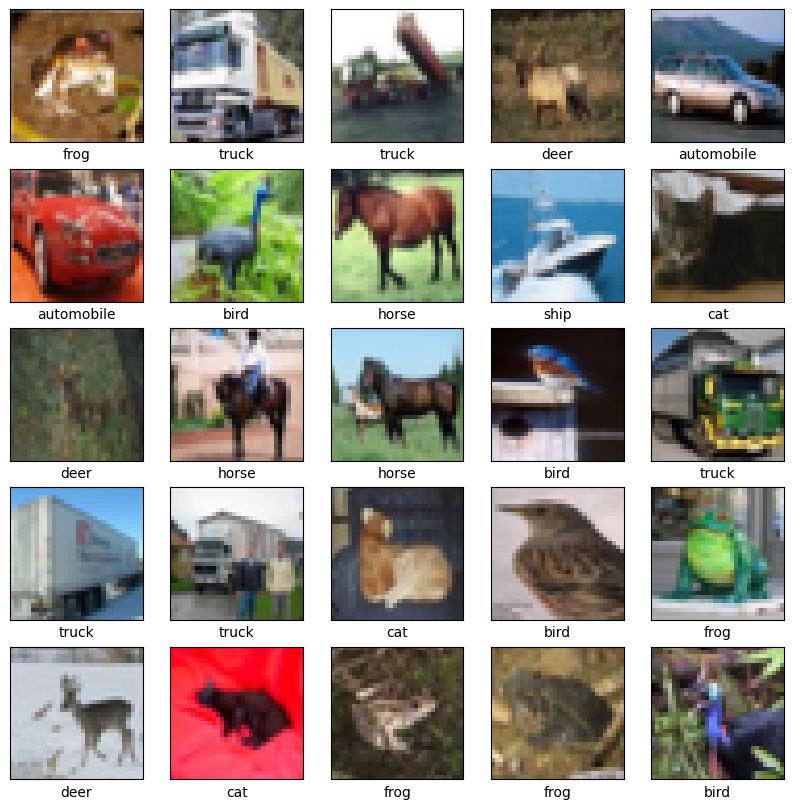

In [2]:
# xây dựng và huấn luyện một mạng nơ-ron sử dụng dữ liệu từ bộ dữ liệu CIFAR-1
#TensorFlow, TensorFlow Keras (cho việc xây dựng mô hình), và Matplotlib (để hiển thị hình ảnh).
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#Tải bộ dữ liệu CIFAR-10,  
#chứa hình ảnh của 10 loại đối tượng khác nhau, 
#mỗi loại có 6,000 hình ảnh trong tập huấn luyện và 1,000 hình ảnh trong tập kiểm tra.
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
#chuẩn hóa giá trị pixel của ảnh từ 0 tới 255 thành 0 1 để giúp mô hình hoạt động tốt hơn
train_images, test_images = train_images / 255.0, test_images / 255.0

#định nghĩa  một danh sách tên lớp tương ứng với các số nguyên trong nhãn CIFAR-10. Điều này sẽ giúp chúng ta hiển thị tên lớp thay vì số khi vẽ hình ảnh.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

#tao hình vẽ có kích thước 10x10 inch để hiển thị các ảnh
plt.figure(figsize=(10,10))

#vòng lặp 25 để hiển thị 25 ảnh từ tập huấn luyện trong 1 lưới 5x5
#Các hình ảnh được lấy từ train_images, và tên lớp tương ứng được hiển thị bên dưới mỗi hình ảnh. 
for i in range(25):
    plt.subplot(5,5,i+1) #tạo ô con trong lưới 5x5, hiển thị ảnh có đối sô i+1
    plt.xticks([])  #loại bỏ các dấu chấm trên trục x/y của ô con giúp chỉ hiện thị ảnh
    plt.yticks([])
    plt.grid(False)  #tắt các lưới trên hình ảnh
    plt.imshow(train_images[i])  #hiển thị ảnh lên ô con nhưng chưa hiển thị trên màn hình
    
    # sử dụng train_labels[i][0] để truy cập nhãn của hình ảnh thứ i
    #sau đó dùng nhãn này làm chỉ mục để lấy tên lớp tương ứng từ danh sách class_names.
    plt.xlabel(class_names[train_labels[i][0]])

#hiển thị ảnh lên màn hình
plt.show()

#Mục đích chính là để kiểm tra và hiểu về dữ liệu trước khi xây dựng và huấn 
#luyện một mô hình máy học trên bộ dữ liệu này.

2.13.0
4422102/4422102 [==============================] - 1s 0us/step


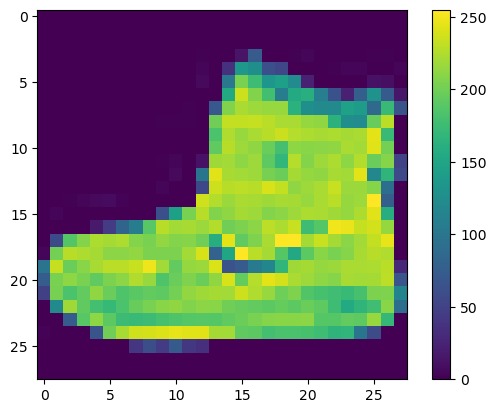

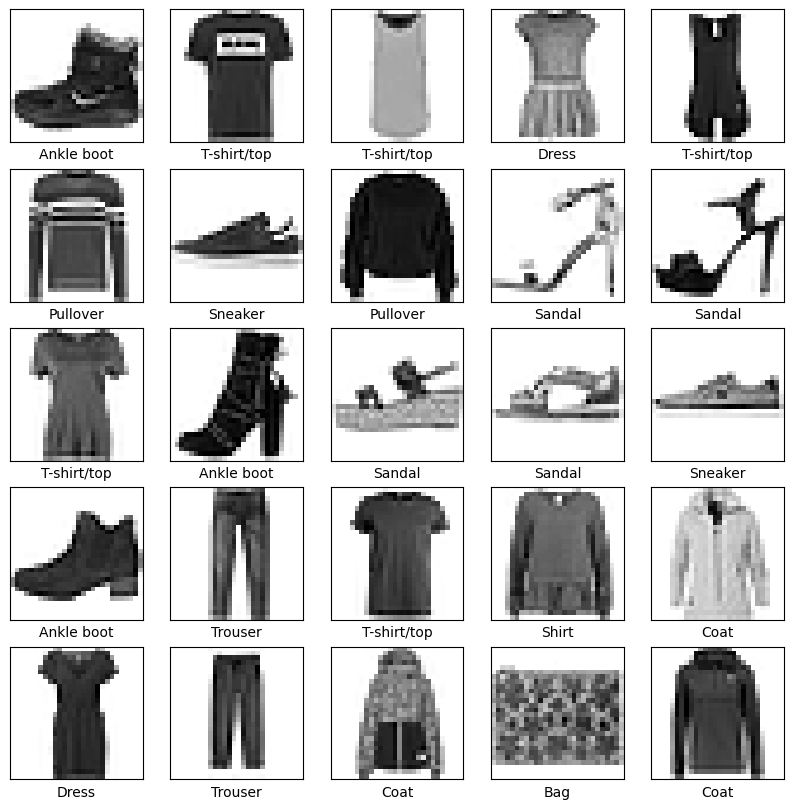

In [4]:
#xây dụng và huấn luyện mô hình
import tensorflow as tf
# thực hiện các phép toán số học và hình ảnh
import numpy as np
import matplotlib.pyplot as plt
#hiển thị phiên bản
print(tf.__version__)

#tải dữ liệu Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
#chia dữ liệu tải về thành tập huẩn luyện và tập kiểm tra
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#định nghĩa danh sách tên lớp tương ứng với các nhãn là số trong tập dữ liệu
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#kiểm tra kích thước của tập huấn luyện
train_images.shape

#hiển thị hình ảnh đầu tiên từ tập huấn luyện
plt.figure()
plt.imshow(train_images[0])
plt.colorbar() #hiển thị thêm màu cho biết giá trị màu sác tương ứng với từng điểm ảnh
plt.grid(False) #tắt lưới hình ảnh
plt.show() #làm cho hình ảnh hiện lên màn

#chuẩn hóa giá trị pixel cho ảnh từ 0 tới 1
train_images = train_images / 255.0
test_images = test_images / 255.0

#tao hình vẽ có kích thước 10x10 inch để hiển thị các ảnh để chứa 1 lưới 5x5 chứa 25 ảnh
plt.figure(figsize=(10,10))

for i in range(25): 
    plt.subplot(5,5,i+1)  #tạo ô con trong lưới 5x5, hiển thị ảnh có đối sô i+1
    plt.xticks([])  #loại bỏ các dấu chấm trên các trục
    plt.yticks([])
    plt.grid(False) #tắt lưới trên hình ảnh
    plt.imshow(train_images[i], cmap=plt.cm.binary) #hiển hị ảnh từ tập huấn luyện và để dưới dang trắng đen
    plt.xlabel(class_names[train_labels[i]]) #đặt tên lớp tương ứng dưới mỗi ảnh
plt.show() #hiển thị toàn bộ ảnh lên màn 

#Mục đích chung của đoạn mã này là tải dữ liệu Fashion MNIST, 
#hiển thị một số hình ảnh từ tập huấn luyện cùng với tên lớp tương ứng để kiểm tra 
#và hiểu dữ liệu trước khi xây dựng và huấn luyện một mô hình máy học trên bộ dữ liệu này.




